In [2]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
import seaborn as sns
import matplotlib.pyplot as plt
import importlib
import pca_module
importlib.reload(pca_module)

<module 'pca_module' from 'C:\\Users\\ilija\\ФИНКИ\\7th_Semester\\LinearAlgebra\\py\\pca_module.py'>

##################################################################################################################
# Breast cancer dataset

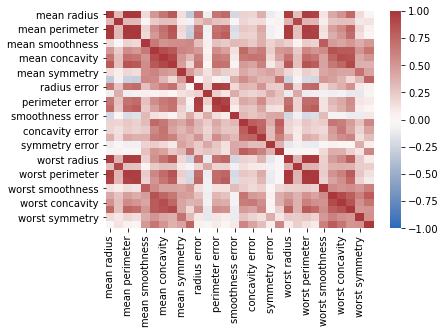


Dataset dimensions:
(569, 30)

Starting dataset head:
   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst

In [3]:
breast_cancer = load_breast_cancer()
breast_cancer_dataset = pd.DataFrame(breast_cancer.data, columns=breast_cancer.feature_names)
breast_cancer_target = pd.Series(breast_cancer.target, name = 'target')
breast_cancer_dataset_with_target = pd.concat([breast_cancer_dataset, breast_cancer_target], axis = 1)
breast_cancer_dataset_with_target.head()

correlation_matrix = breast_cancer_dataset.corr()
sns.heatmap(correlation_matrix, vmin = -1, vmax = 1, cmap = sns.color_palette("vlag", as_cmap=True)) 
plt.show()

results_eig = pca_module.pca(breast_cancer_dataset)
results_svd = pca_module.pca(breast_cancer_dataset, svd = True)
print(breast_cancer_target)

In [4]:
pca_module.print_numpy(results_svd['explained_var'])

[0.4427202560752633, 0.18971182044033094, 0.09393163257431386, 0.06602134915470152, 0.0549576849234627, 0.0402452203988335, 0.022507337129825094, 0.015887238000213282, 0.013896493745591123, 0.011689781894131503, 0.009797189875980179, 0.008705379007378836, 0.008045249871967315, 0.005233657454926351, 0.003137832167627401, 0.0026620933651523154, 0.001979967925324275, 0.0017539594502263593, 0.001649253059225163, 0.0010386467483386975, 0.0009990964637002493, 0.0009146467510543513, 0.000811361258899108, 0.0006018335666716695, 0.0005160423791651896, 0.00027258799547750693, 0.00023001546250596565, 5.297792903808818e-05, 2.4960103246876944e-05, 4.434827427360696e-06]


In [5]:
np.cumsum(results_svd['explained_var'])

array([0.44272026, 0.63243208, 0.72636371, 0.79238506, 0.84734274,
       0.88758796, 0.9100953 , 0.92598254, 0.93987903, 0.95156881,
       0.961366  , 0.97007138, 0.97811663, 0.98335029, 0.98648812,
       0.98915022, 0.99113018, 0.99288414, 0.9945334 , 0.99557204,
       0.99657114, 0.99748579, 0.99829715, 0.99889898, 0.99941502,
       0.99968761, 0.99991763, 0.99997061, 0.99999557, 1.        ])

# 17 of the principal components explain 99 percent of the variance in the data
# this means that we can reduce the dataset dimensionality by 13

In [20]:
breast_cancer_dataset_np = breast_cancer_dataset.to_numpy()
breast_cancer_dataset_np.shape

(569, 30)

In [21]:
pca_transform_matrix = np.swapaxes(results_svd['eigenvectors'][:17], 0, 1)
pca_transform_matrix.shape

(30, 17)

In [22]:
breast_cancer_dataset_np = np.matmul(breast_cancer_dataset_np, pca_transform_matrix)

In [23]:
breast_cancer_dataset_np.shape

(569, 17)